<a href="https://colab.research.google.com/github/Akash-sahay/Machine-Learning-and-data-analytics/blob/main/Week_3(svm_and_mnb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/emails (1).csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
df.describe()



,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
spam_mails = df[df.spam ==1]
non_spam_mails = df[df.spam ==0]

In [ ]:
droped = df.drop(['Email No.', 'spam'], axis=1).sum().sort_values(ascending=False)
droped.head()

e    438561
t    312791
a    287136
o    284970
n    248777
dtype: int64

In [ ]:
spam_mails_most_frq = spam_mails.drop(['Email No.', 'spam'], axis=1).sum().sort_values(ascending=False)
spam_mails_most_frq.head()     # most used words in a spam e-mail

e    12873
o    10324
t     9473
a     8896
r     7818
dtype: int64

In [ ]:
non_spam_most_frq =non_spam_mails.drop(['Email No.', 'spam'], axis=1).sum().sort_values(ascending=False)
non_spam_most_frq.head()       #most used words in a non spam e-mail

e    424653
t    302547
a    277415
o    273874
n    240696
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
top_col=droped.head()
f=df[['Email No.', 'spam']+ list(top_col.index)]
f.head()

,Email No.,spam,e,t,a,o,n
0,Email 1,0,4,4,2,0,0
1,Email 2,0,141,91,102,131,70
2,Email 3,0,3,3,8,5,8
3,Email 4,0,79,49,51,48,23
4,Email 5,0,71,63,57,58,42


In [ ]:
top_col_1=spam_mails_most_frq.head()
f1=df[['Email No.', 'spam']+ list(top_col_1.index)]
f1.head()

,Email No.,spam,e,o,t,a,r
0,Email 1,0,4,0,4,2,4
1,Email 2,0,141,131,91,102,122
2,Email 3,0,3,5,3,8,0
3,Email 4,0,79,48,49,51,46
4,Email 5,0,71,58,63,57,41


In [ ]:
top_col_2=non_spam_most_frq.head()
f2=df[['Email No.', 'spam']+ list(top_col_2.index)]
f2.head()

,Email No.,spam,e,t,a,o,n
0,Email 1,0,4,4,2,0,0
1,Email 2,0,141,91,102,131,70
2,Email 3,0,3,3,8,5,8
3,Email 4,0,79,49,51,48,23
4,Email 5,0,71,63,57,58,42


<Axes: xlabel='Email No.', ylabel='Count'>

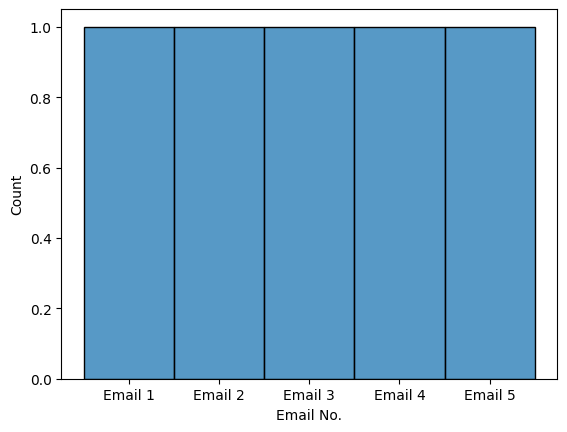

In [ ]:
sns.histplot(x='Email No.', data=f1.head())

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

In [ ]:
relevant_cols = droped.head(1500)
relevant_cols                                 # getting the 1.5k relevant columns

e           438561
t           312791
a           287136
o           284970
n           248777
             ...  
cernosek       100
pick           100
features       100
officer        100
apache         100
Length: 1500, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,train_size=0.6)

In [ ]:
train

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4679,Email 4680,3,2,1,1,1,0,11,2,0,...,0,0,0,0,0,0,0,0,0,1
3467,Email 3468,10,12,5,6,9,4,98,7,1,...,0,0,0,0,0,0,0,1,0,1
538,Email 539,4,1,1,0,3,0,14,1,0,...,0,0,0,0,0,0,0,0,0,0
2858,Email 2859,4,4,2,1,2,8,39,5,2,...,0,0,0,0,0,0,0,1,0,1
285,Email 286,3,5,2,0,1,0,26,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,Email 4198,7,0,3,1,1,3,33,9,0,...,0,0,0,0,0,0,0,0,0,1
2219,Email 2220,9,14,18,4,6,1,96,4,8,...,0,0,0,0,0,0,0,0,0,0
1862,Email 1863,2,6,1,2,2,1,37,3,0,...,0,0,0,0,0,0,0,0,0,1
4272,Email 4273,1,0,1,1,1,0,12,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3051,Email 3052,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,Email 4787,0,5,3,1,2,0,62,0,0,...,0,0,0,0,0,0,0,0,0,1
2890,Email 2891,5,6,9,5,3,1,41,2,4,...,0,0,0,0,0,0,0,0,0,0
181,Email 182,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4601,Email 4602,78,69,23,48,38,51,543,7,4,...,0,0,0,0,0,0,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,Email 897,12,12,2,10,6,17,96,10,2,...,0,0,0,0,0,0,0,1,0,1
1029,Email 1030,10,6,4,3,5,2,45,10,0,...,0,0,0,0,0,0,0,0,0,0
3677,Email 3678,0,0,1,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4172,Email 4173,5,5,8,0,6,0,36,0,4,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train =train.iloc[:, 1:3001]
x_train

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4679,3,2,1,1,1,0,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3467,10,12,5,6,9,4,98,7,1,22,...,0,0,0,0,0,0,0,0,1,0
538,4,1,1,0,3,0,14,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2858,4,4,2,1,2,8,39,5,2,5,...,0,0,0,0,0,0,0,0,1,0
285,3,5,2,0,1,0,26,5,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,7,0,3,1,1,3,33,9,0,13,...,0,0,0,0,0,0,0,0,0,0
2219,9,14,18,4,6,1,96,4,8,16,...,0,0,0,0,0,0,0,0,0,0
1862,2,6,1,2,2,1,37,3,0,3,...,0,0,0,0,0,0,0,0,0,0
4272,1,0,1,1,1,0,12,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test =test.iloc[:, 1:3001]
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3051,0,0,1,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,5,3,1,2,0,62,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2890,5,6,9,5,3,1,41,2,4,3,...,0,0,0,0,0,0,0,0,0,0
181,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4601,78,69,23,48,38,51,543,7,4,146,...,0,0,0,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,12,12,2,10,6,17,96,10,2,12,...,0,0,0,0,0,0,0,0,1,0
1029,10,6,4,3,5,2,45,10,0,11,...,0,0,0,0,0,0,0,0,0,0
3677,0,0,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4172,5,5,8,0,6,0,36,0,4,7,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
ytrain =train['Prediction']
ytest = test['Prediction']

## Train - Test Split

In [ ]:
# Create trianing and testing data

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,train_size=0.6)

In [ ]:
x_train =train.iloc[:, 1:3001]
x_train

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3648,2,1,1,0,0,2,10,2,0,7,...,0,0,0,0,0,0,0,0,0,0
1851,13,6,13,3,6,3,80,3,8,7,...,0,0,0,0,0,0,0,0,1,0
2485,11,9,5,3,8,0,78,2,2,19,...,0,0,0,0,0,0,0,0,0,0
3665,0,0,1,1,1,2,15,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4508,0,0,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,4,7,2,2,0,0,36,1,0,8,...,0,0,0,0,0,0,0,0,0,0
4497,0,0,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,8,3,2,4,1,1,29,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4974,8,33,6,7,5,3,184,9,0,17,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_test =test.iloc[:, 1:3001]
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3995,6,3,15,2,7,1,67,4,6,7,...,0,0,0,0,0,0,0,0,2,0
2665,4,0,1,0,5,0,20,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4429,41,43,20,36,17,47,381,9,1,115,...,0,0,0,1,0,0,0,0,11,0
4721,2,4,1,0,0,3,11,3,0,4,...,0,0,0,0,0,0,0,0,0,0
3458,4,3,1,0,1,2,14,4,1,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,4,8,1,1,1,0,24,3,0,5,...,0,0,0,0,0,0,0,0,1,0
2933,0,2,3,0,5,0,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3063,0,0,1,0,1,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1632,0,1,1,2,1,5,10,0,0,3,...,0,0,0,0,0,0,0,0,2,0


## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier

In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, ytrain)
y_pred = mnb.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(ytest, y_pred)            # thus we have an accuracy of 61.11 %

0.611406476558724

## Plot the confusion Matrix

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix



In [ ]:
confusion_matrix(ytest, y_pred)

array([[1102,  351],
       [ 453,  163]])

## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

In [ ]:
from sklearn import svm
modl = svm.SVC()
modl.fit(x_train, ytrain)
svm_prediction = modl.predict(x_test)
svm_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(ytest, svm_prediction)  # thus we have a 69.9% accuracy in case of svm


0.6998550024166263

In [ ]:
confusion_matrix(ytest, svm_prediction)

array([[1448,    5],
       [ 616,    0]])

## Comparing the models

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
#answer - we will use svm due to higher accuracy associated with it.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}